In [47]:
# Data Handling & Manipulation
import pandas as pd                                         # for dataframes, CSV/Excel reading, tabular data manipulation
import numpy as np                                          # for numerical operations and array handling

# Data Visualisation (Static)
import matplotlib.pyplot as plt                             # for creating static plots
from matplotlib.ticker import FuncFormatter                 # for customising tick labels (e.g., currency, %)
import seaborn as sns                                       # for statistical visualisation (heatmaps, distplots, etc.)

# Data Visualisation (Interactive)
import plotly.express as px                                 # for quick and interactive visualisation
import plotly.graph_objects as go                           # for custom interactive plots
from plotly.subplots import make_subplots                   # for interactive subplots

# Statistical Testing & Inference
from statsmodels.stats.proportion import proportions_ztest  # for comparing proportions (e.g., late vs. on-time)
from scipy.stats import (
    normaltest,                                             # for checking normality
    chi2_contingency,                                       # for categorical association
    mannwhitneyu,                                           # for non-parametric testing
    ttest_ind,                                              # for independent sample t-test
    f_oneway,                                               # for one-way ANOVA
    kruskal,                                                # for Kruskal-Wallis test
    kstest,                                                 # for Kolmogorov-Smirnov test
    spearmanr                                               # for spearmean correlation
)
import statsmodels.api as sm                                # for advanced statistical modelling and diagnostics
import statsmodels.formula.api as smf                       # for formula-based statistical models
from statsmodels.stats.multicomp import pairwise_tukeyhsd   # for post-hoc tests after ANOVA

# Data Quality & Missing Value Visualisation
import missingno as msno                                    # for visualising missing data patterns

# System & Settings
import os                                                   # for file handling and directory operations
import warnings                                             # to suppress or manage warning messages
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_colwidth', None)                 # display full content in cells (useful for text data)

In [48]:
# List of date columns for each Olist dataset
# This dictionary maps each dataset filename to a list of columns that should be parsed as dates.
date_cols = {
    'olist_orders_dataset.csv': [
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date',
    ],
    'olist_order_items_dataset.csv': [
        'shipping_limit_date',
    ],
    'olist_order_reviews_dataset.csv': [
        'review_creation_date',
        'review_answer_timestamp',
    ],
    # The following datasets have NO date columns:
    # 'olist_customers_dataset.csv'
    # 'olist_geolocation_dataset.csv'
    # 'olist_order_payments_dataset.csv'
    # 'olist_products_dataset.csv'
    # 'olist_sellers_dataset.csv'
    # 'product_category_name_translation.csv'
    'master_olist_dataset.csv': [
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date',
        'shipping_limit_date',
        'review_creation_date',
        'review_answer_timestamp',
    ]
}

def read_olist_csv(path):
    """
    Reads an Olist CSV and parses dates for the correct columns.
    Args:
        path (str): Path to the CSV file.
    Returns:
        pd.DataFrame: Loaded dataframe with date columns parsed as datetime.
    """
    # Extract just the filename, e.g., 'olist_orders_dataset.csv'
    filename = os.path.basename(path)
    # Get the correct date columns for this file, or an empty list
    parse_dates = date_cols.get(filename, [])
    # Read the CSV, parsing the specified date columns (if any)
    return pd.read_csv(path, parse_dates=parse_dates)

In [49]:
original_df_orders           = read_olist_csv('../data/original_data/olist_orders_dataset.csv')
original_df_customers        = read_olist_csv('../data/original_data/olist_customers_dataset.csv')
original_df_order_items      = read_olist_csv('../data/original_data/olist_order_items_dataset.csv')
original_df_order_payments   = read_olist_csv('../data/original_data/olist_order_payments_dataset.csv')
original_df_reviews          = read_olist_csv('../data/original_data/olist_order_reviews_dataset.csv')
original_df_products         = read_olist_csv('../data/original_data/olist_products_dataset.csv')
original_df_prod_cat_tr      = read_olist_csv('../data/original_data/product_category_name_translation.csv')
original_df_sellers          = read_olist_csv('../data/original_data/olist_sellers_dataset.csv')
original_df_geolocation      = read_olist_csv('../data/original_data/olist_geolocation_dataset.csv')

In [50]:
cleaned_delivered_df_orders           = read_olist_csv('../data/cleaned_data/olist_orders_dataset.csv')
cleaned_df_customers        = read_olist_csv('../data/cleaned_data/olist_customers_dataset.csv')
cleaned_delivered_df_order_items      = read_olist_csv('../data/cleaned_data/olist_order_items_dataset.csv')
cleaned_delivered_df_order_payments   = read_olist_csv('../data/cleaned_data/olist_order_payments_dataset.csv')
cleaned_delivered_df_reviews          = read_olist_csv('../data/cleaned_data/olist_order_reviews_dataset.csv')
cleaned_df_products         = read_olist_csv('../data/cleaned_data/olist_products_dataset.csv')
cleaned_df_prod_cat_tr      = read_olist_csv('../data/cleaned_data/product_category_name_translation.csv')
cleaned_df_sellers          = read_olist_csv('../data/cleaned_data/olist_sellers_dataset.csv')
cleaned_df_geolocation      = read_olist_csv('../data/cleaned_data/olist_geolocation_dataset.csv')

In [51]:
master_olist_dataset = read_olist_csv('../data/cleaned_data/master_olist_dataset.csv')

In [52]:
master_olist_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109933 entries, 0 to 109932
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       109933 non-null  object        
 1   customer_id                    109933 non-null  object        
 2   order_status                   109933 non-null  object        
 3   order_purchase_timestamp       109933 non-null  datetime64[ns]
 4   order_approved_at              109933 non-null  datetime64[ns]
 5   order_delivered_carrier_date   109933 non-null  datetime64[ns]
 6   order_delivered_customer_date  109933 non-null  datetime64[ns]
 7   order_estimated_delivery_date  109933 non-null  datetime64[ns]
 8   customer_unique_id             109933 non-null  object        
 9   customer_zip_code_prefix       109933 non-null  int64         
 10  customer_city                  109933 non-null  object        
 11  

In [53]:
# Core delay & flag features
master_olist_dataset['is_late']    = master_olist_dataset['order_delivered_customer_date'] > master_olist_dataset['order_estimated_delivery_date']
master_olist_dataset['late_days']    = (master_olist_dataset['order_delivered_customer_date'] - master_olist_dataset['order_estimated_delivery_date']).dt.days #or delay days
master_olist_dataset['dispatch_delay'] = (master_olist_dataset['order_delivered_carrier_date'] - master_olist_dataset['shipping_limit_date']).dt.days
master_olist_dataset['is_late_dispatch'] = (master_olist_dataset['dispatch_delay'] > 0)
master_olist_dataset['dispatch_time'] = (master_olist_dataset['order_delivered_carrier_date'] - master_olist_dataset['order_approved_at']).dt.days
master_olist_dataset['transit_time']  = (master_olist_dataset['order_delivered_customer_date']  - master_olist_dataset['order_delivered_carrier_date']).dt.days
master_olist_dataset['delivery_days'] = (master_olist_dataset['order_delivered_customer_date'] - master_olist_dataset['order_purchase_timestamp']).dt.days

# Review bucket
master_olist_dataset['review_bucket'] = master_olist_dataset['review_score'].apply(lambda x: 'Good (4-5)' if x > 3 else 'Bad (1-3)')

In [54]:
df = master_olist_dataset.copy()

In [55]:
master_olist_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,has_review,product_category_name_english,is_late,late_days,dispatch_delay,is_late_dispatch,dispatch_time,transit_time,delivery_days,review_bucket
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,True,housewares,False,-8,-2,False,2,6,8,Good (4-5)
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,True,perfumery,False,-6,-4,False,0,12,13,Good (4-5)
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,True,auto,False,-18,-5,False,0,9,9,Good (4-5)
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,True,pet_shop,False,-13,-2,False,3,9,13,Good (4-5)
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,True,stationery,False,-10,-6,False,0,1,2,Good (4-5)


In [56]:
print(df.columns.tolist())

['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'total_payment_value', 'n_payments', 'payment_types', 'max_installments', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'has_review', 'product_category_name_english', 'is_late', 'late_days', 'dispatch_delay', 'is_late_dispatch', 'dispatch_time', 'transit_time', 'delivery_days', 'review_bucket']


only example (no need to run)

Olist-like DataFrame called df with at least these columns:

'seller_id'

'order_approved_at' (datetime)

'is_late' (1/0 or True/False)

'order_id'

'freight_value'

'order_item_id' (for item-level, not always present in aggregated Olist orders)

'shipping_limit_date', 'order_delivered_carrier_date' (both datetime, for dispatch late)

If you use order-level data, you might need to pre-aggregate some columns (e.g., total items per order).

New features : 
1. 

1. Seller 30 and 90's days rolling late delivery and order account 


In [57]:

df = df.sort_values(['seller_id', 'order_approved_at'])

def cycled_features(df, days, target_col):
    results = pd.Series(index=df.index, dtype='float')
    counts = pd.Series(index=df.index, dtype='int')
    for seller_id, s_group in df.groupby('seller_id'):
        s_group = s_group.sort_values('order_approved_at')
        rate_list = []
        count_list = []
        for idx, row in s_group.iterrows():
            end_date = row['order_approved_at']
            start_date = end_date - pd.Timedelta(days=days)
            window = s_group[(s_group['order_approved_at'] >= start_date) & (s_group['order_approved_at'] <= end_date)]
            rate = window[target_col].mean() if not window.empty else 0
            count = len(window)
            rate_list.append(rate)
            count_list.append(count)
        results.loc[s_group.index] = rate_list
        counts.loc[s_group.index] = count_list
    return results, counts

df['seller_30d_late_rate_is_late'], df['seller_30d_order_count'] = cycled_features(df, 30, 'is_late')
df['seller_90d_late_rate_is_late'], df['seller_90d_order_count'] = cycled_features(df, 90, 'is_late')


In [58]:
df['seller_30d_late_rate_is_dispatch_late'], _ = cycled_features(df, 30, 'is_late_dispatch')
df['seller_90d_late_rate_is_dispatch_late'], _ = cycled_features(df, 90, 'is_late_dispatch')

In [59]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,dispatch_time,transit_time,delivery_days,review_bucket,seller_30d_late_rate_is_late,seller_30d_order_count,seller_90d_late_rate_is_late,seller_90d_order_count,seller_30d_late_rate_is_dispatch_late,seller_90d_late_rate_is_dispatch_late
77077,d455a8cb295653b55abda06d434ab492,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30,3c7e305796add66698959fc7ad176f6b,87502,...,1,8,10,Good (4-5),0.0,1.0,0.0,1.0,0.000000,0.000000
538,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06,9915eb9f74b6c11aaf04833f65b00e93,38600,...,5,7,12,Good (4-5),0.0,2.0,0.0,2.0,0.000000,0.000000
84350,7f39ba4c9052be115350065d07583cac,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09,9de5797cddb92598755a0f76383ddbbb,35490,...,1,7,9,Bad (1-3),0.0,3.0,0.0,3.0,0.000000,0.000000
5348,3c655487f0c8e34cde2c7b67de8f08cc,5091c4ca04945991068cfba00258cc58,delivered,2017-02-04 19:06:04,2017-02-04 19:15:39,2017-02-10 09:24:35,2017-03-06 08:28:57,2017-03-13,05453ef86290884066d89d2ec2dcd0a2,78065,...,5,23,29,Bad (1-3),0.0,1.0,0.0,1.0,1.000000,1.000000
100786,eb188a175542057d90b3ca5628b7b5a0,1eda56b47988d592fec945da9ee88c56,delivered,2017-02-18 23:26:24,2017-02-19 01:02:43,2017-02-21 07:07:39,2017-02-23 09:23:57,2017-03-21,551a43d7e0bb14426e6ca28d7eec8463,23954,...,2,2,4,Good (4-5),0.0,6.0,0.0,6.0,0.166667,0.166667


Seller's lifetime orders

In [60]:
df['total_order_lifetime'] = df.groupby('seller_id')['order_id'].transform('count')

In [61]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,transit_time,delivery_days,review_bucket,seller_30d_late_rate_is_late,seller_30d_order_count,seller_90d_late_rate_is_late,seller_90d_order_count,seller_30d_late_rate_is_dispatch_late,seller_90d_late_rate_is_dispatch_late,total_order_lifetime
77077,d455a8cb295653b55abda06d434ab492,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30,3c7e305796add66698959fc7ad176f6b,87502,...,8,10,Good (4-5),0.0,1.0,0.0,1.0,0.000000,0.000000,3
538,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06,9915eb9f74b6c11aaf04833f65b00e93,38600,...,7,12,Good (4-5),0.0,2.0,0.0,2.0,0.000000,0.000000,3
84350,7f39ba4c9052be115350065d07583cac,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09,9de5797cddb92598755a0f76383ddbbb,35490,...,7,9,Bad (1-3),0.0,3.0,0.0,3.0,0.000000,0.000000,3
5348,3c655487f0c8e34cde2c7b67de8f08cc,5091c4ca04945991068cfba00258cc58,delivered,2017-02-04 19:06:04,2017-02-04 19:15:39,2017-02-10 09:24:35,2017-03-06 08:28:57,2017-03-13,05453ef86290884066d89d2ec2dcd0a2,78065,...,23,29,Bad (1-3),0.0,1.0,0.0,1.0,1.000000,1.000000,234
100786,eb188a175542057d90b3ca5628b7b5a0,1eda56b47988d592fec945da9ee88c56,delivered,2017-02-18 23:26:24,2017-02-19 01:02:43,2017-02-21 07:07:39,2017-02-23 09:23:57,2017-03-21,551a43d7e0bb14426e6ca28d7eec8463,23954,...,2,4,Good (4-5),0.0,6.0,0.0,6.0,0.166667,0.166667,234


sum of freight value per order_id (not order item id)

In [62]:
test = df.groupby(['order_id','freight_value'])['order_item_id'].count().reset_index()
test.head(25)

,order_id,freight_value,order_item_id
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,19.93,1
2,000229ec398224ef6ca0657da4fc703e,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,1
5,00048cc3ae777c65dbb7d2a0634bc1ea,12.69,1
6,00054e8431b9d7675808bcb819fb4a32,11.85,1
7,000576fe39319847cbb9d288c5617fa6,70.75,1
8,0005a1a1728c9d785b8e2b08b904576c,11.65,1
9,0005f50442cb953dcd1d21e1fb923495,11.40,1


In [63]:
lala_tes= master_olist_dataset.groupby(['order_id', 'order_item_id'])['freight_value'].first().reset_index()
lala_tes.head(20)

,order_id,order_item_id,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,13.29
1,00018f77f2f0320c557190d7a144bdd3,1.0,19.93
2,000229ec398224ef6ca0657da4fc703e,1.0,17.87
3,00024acbcdf0a6daa1e931b038114c75,1.0,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1.0,12.69
6,00054e8431b9d7675808bcb819fb4a32,1.0,11.85
7,000576fe39319847cbb9d288c5617fa6,1.0,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1.0,11.65
9,0005f50442cb953dcd1d21e1fb923495,1.0,11.40


freight value sum per order_id

In [64]:
sum_freight_value = (
    df.groupby('order_id')['freight_value']
    .sum()
    .reset_index(name='sum_freight_value')
)
df = df.merge(sum_freight_value, on='order_id', how='left')

In [65]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,delivery_days,review_bucket,seller_30d_late_rate_is_late,seller_30d_order_count,seller_90d_late_rate_is_late,seller_90d_order_count,seller_30d_late_rate_is_dispatch_late,seller_90d_late_rate_is_dispatch_late,total_order_lifetime,sum_freight_value
0,d455a8cb295653b55abda06d434ab492,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30,3c7e305796add66698959fc7ad176f6b,87502,...,10,Good (4-5),0.0,1.0,0.0,1.0,0.000000,0.000000,3,21.02
1,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06,9915eb9f74b6c11aaf04833f65b00e93,38600,...,12,Good (4-5),0.0,2.0,0.0,2.0,0.000000,0.000000,3,21.02
2,7f39ba4c9052be115350065d07583cac,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09,9de5797cddb92598755a0f76383ddbbb,35490,...,9,Bad (1-3),0.0,3.0,0.0,3.0,0.000000,0.000000,3,21.02
3,3c655487f0c8e34cde2c7b67de8f08cc,5091c4ca04945991068cfba00258cc58,delivered,2017-02-04 19:06:04,2017-02-04 19:15:39,2017-02-10 09:24:35,2017-03-06 08:28:57,2017-03-13,05453ef86290884066d89d2ec2dcd0a2,78065,...,29,Bad (1-3),0.0,1.0,0.0,1.0,1.000000,1.000000,234,21.15
4,eb188a175542057d90b3ca5628b7b5a0,1eda56b47988d592fec945da9ee88c56,delivered,2017-02-18 23:26:24,2017-02-19 01:02:43,2017-02-21 07:07:39,2017-02-23 09:23:57,2017-03-21,551a43d7e0bb14426e6ca28d7eec8463,23954,...,4,Good (4-5),0.0,6.0,0.0,6.0,0.166667,0.166667,234,74.35


association between feautures and is_late

In [69]:
print(df.columns.tolist())

['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'total_payment_value', 'n_payments', 'payment_types', 'max_installments', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'has_review', 'product_category_name_english', 'is_late', 'late_days', 'dispatch_delay', 'is_late_dispatch', 'dispatch_time', 'transit_time', 'delivery_days', 'review_bucket', 'seller_30d_

In [76]:

numerical_features = [
    'seller_30d_late_rate_is_late',
    'seller_90d_late_rate_is_late',
    'seller_30d_late_rate_is_dispatch_late',
    'seller_90d_late_rate_is_dispatch_late',
    'seller_30d_order_count',
    'seller_90d_order_count',
    'total_order_lifetime',
    'sum_freight_value'
]

# Pearson correlation
correlations = df[numerical_features + ['is_late']].corr()['is_late'].sort_values(ascending=False)
print("Pearson correlations with is_late:\n", correlations)

# Spearman (for non-normal data)
spearman_corr = df[numerical_features + ['is_late']].corr(method='spearman')['is_late'].sort_values(ascending=False)
print("Spearman correlations with is_late:\n", spearman_corr)



Pearson correlations with is_late:
 is_late                                  1.000000
seller_30d_late_rate_is_late             0.471534
seller_90d_late_rate_is_late             0.359684
seller_30d_late_rate_is_dispatch_late    0.144754
seller_90d_late_rate_is_dispatch_late    0.121373
seller_30d_order_count                   0.035778
seller_90d_order_count                   0.026423
sum_freight_value                        0.016220
total_order_lifetime                     0.007462
Name: is_late, dtype: float64
Spearman correlations with is_late:
 is_late                                  1.000000
seller_30d_late_rate_is_late             0.380612
seller_90d_late_rate_is_late             0.297994
seller_30d_late_rate_is_dispatch_late    0.118587
seller_90d_late_rate_is_dispatch_late    0.098882
sum_freight_value                        0.030502
seller_30d_order_count                   0.029673
seller_90d_order_count                   0.022852
total_order_lifetime                     0.0042

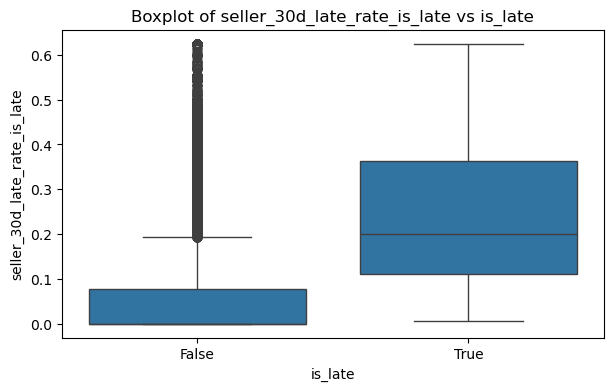

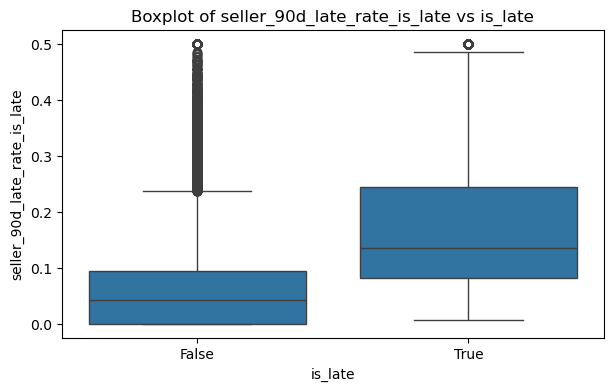

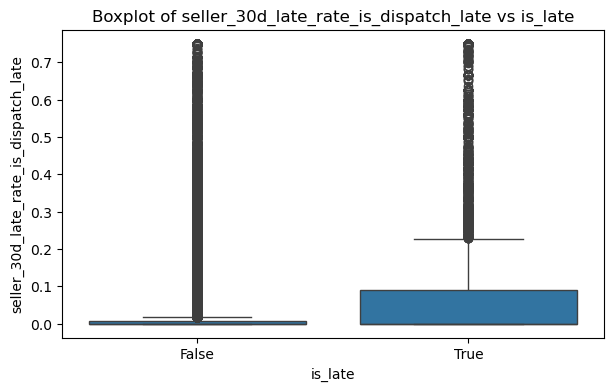

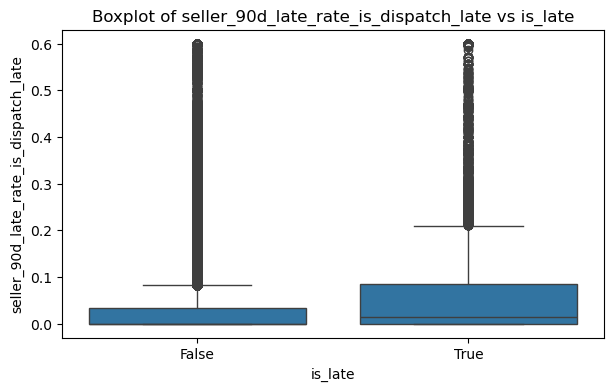

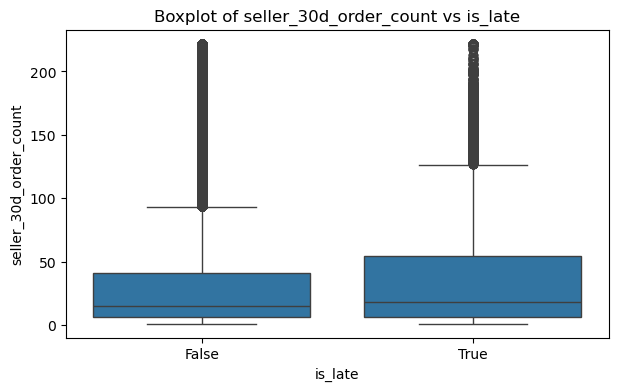

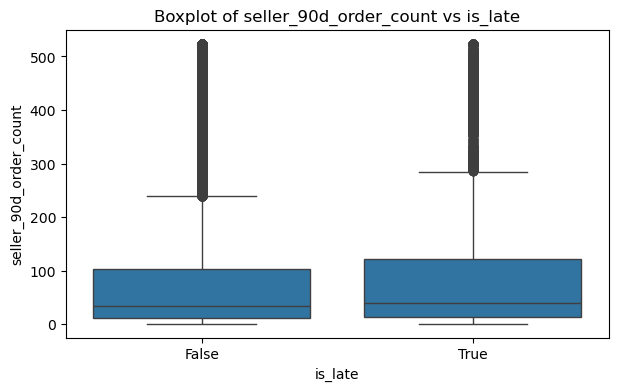

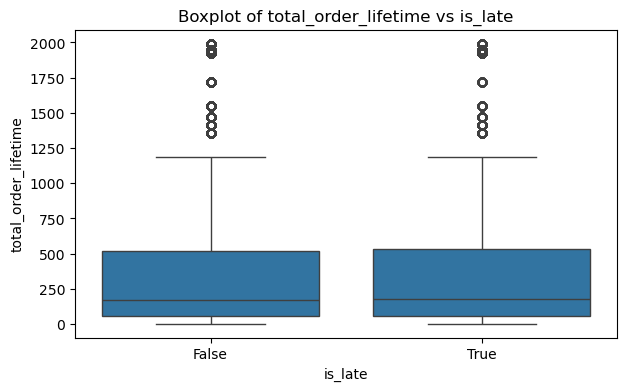

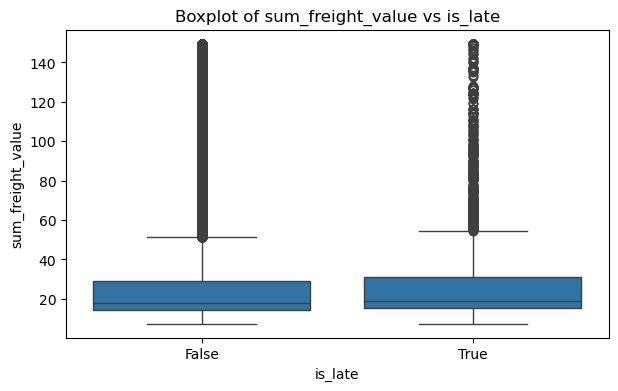

In [102]:

# boxplots before handling outliers
for col in numerical_features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='is_late', y=col, data=df)
    plt.title(f'Boxplot of {col} vs is_late')
    plt.show()

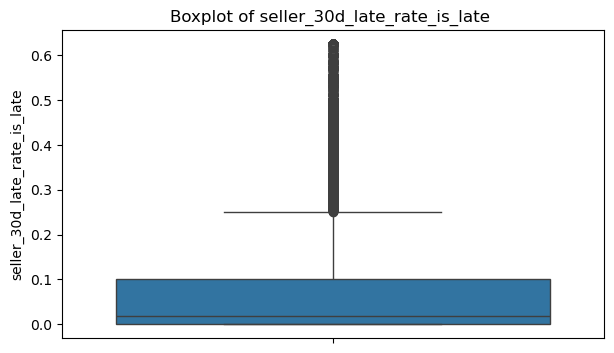

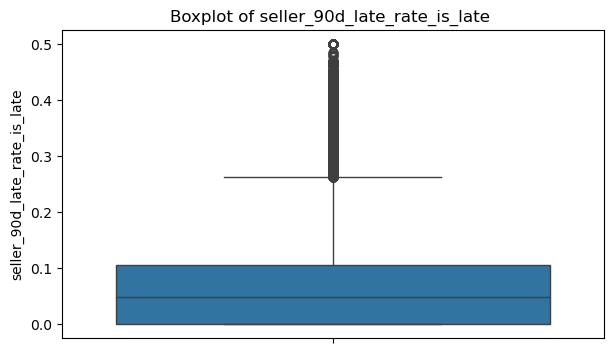

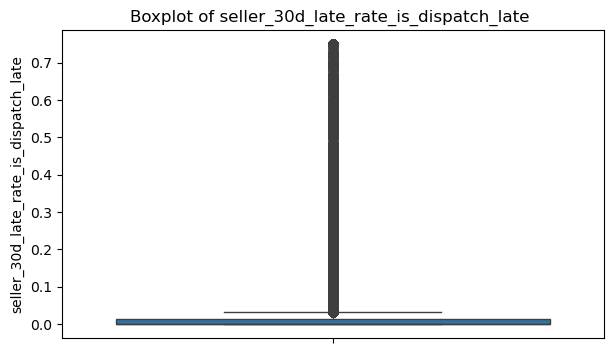

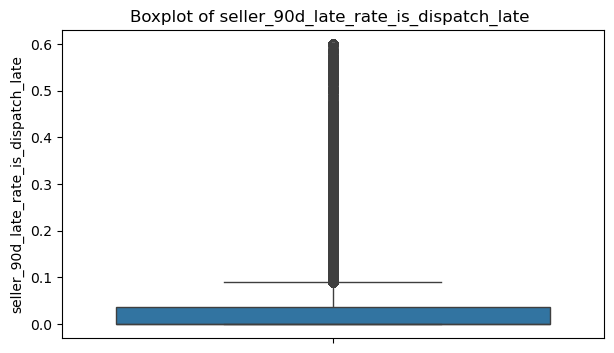

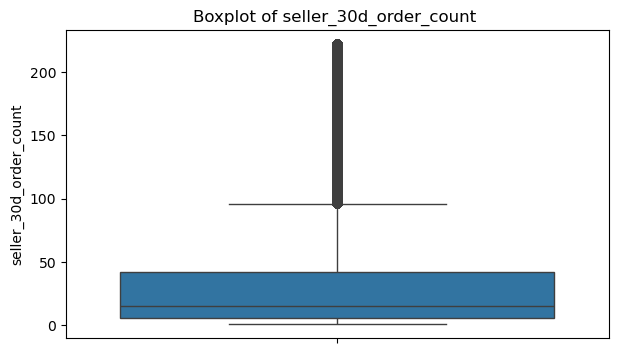

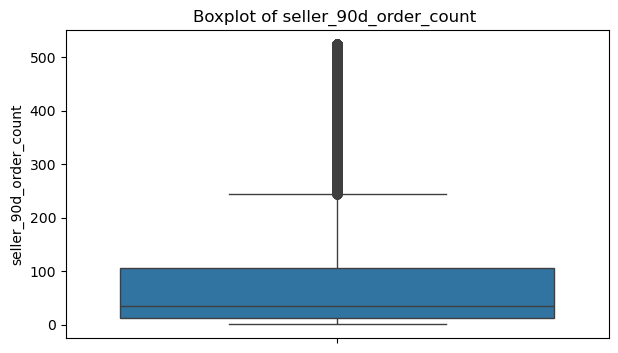

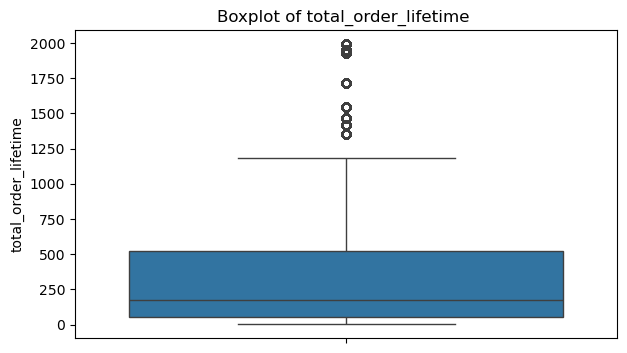

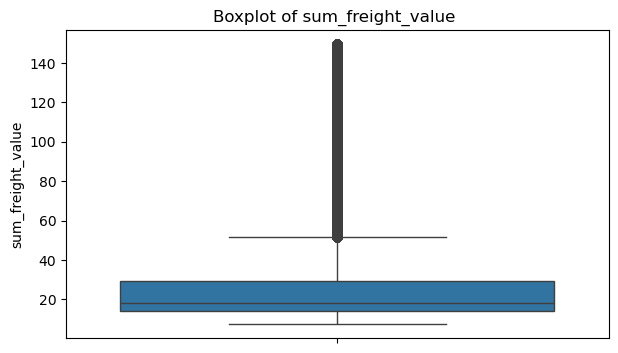

In [104]:
for col in numerical_features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot of {col} ')
    plt.show()

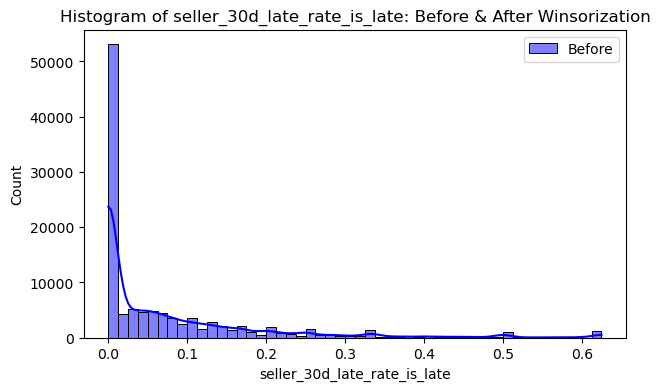

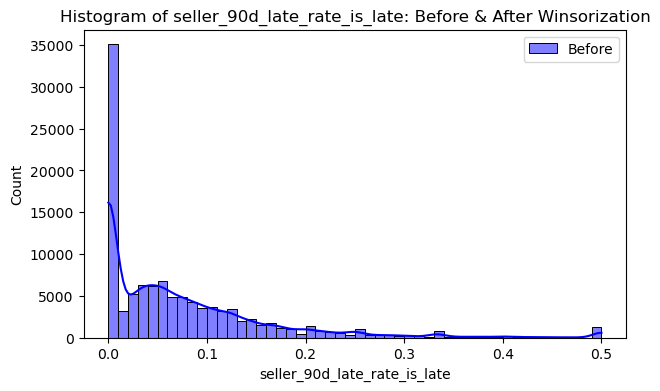

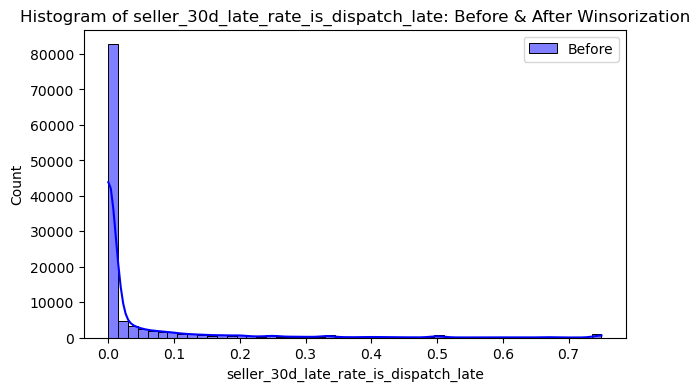

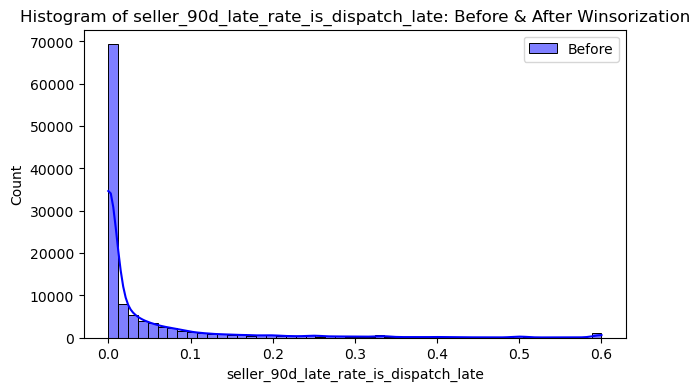

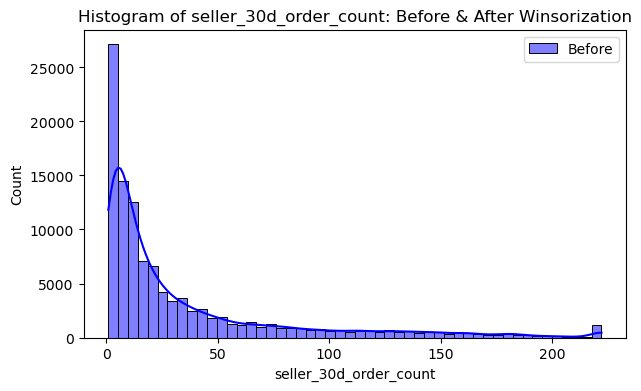

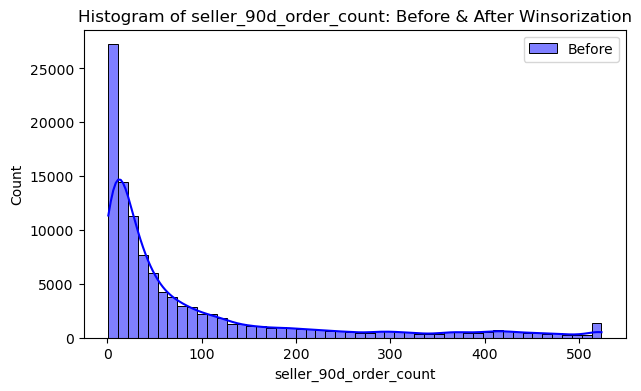

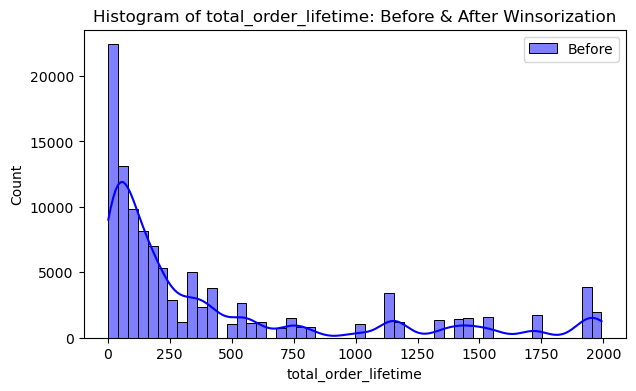

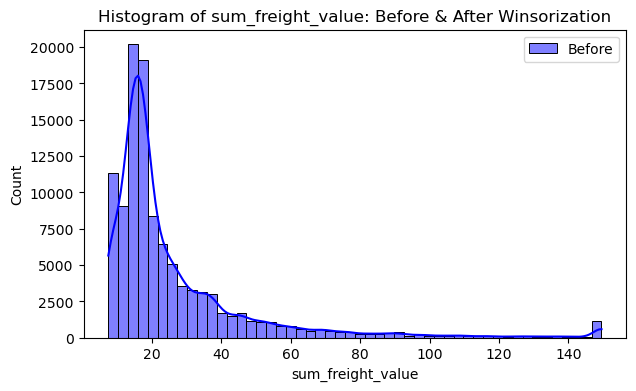

In [94]:
for col in numerical_features:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], bins=50, kde=True, color='blue', label='Before', alpha=0.5)
    plt.legend()
    plt.title(f'Histogram of {col}: Before & After Winsorization')
    plt.show()